<a href="https://colab.research.google.com/github/sudhav2024/Machine-Learning/blob/main/ex8b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1/100 - Training MSE: 0.1934
Iteration 10/100 - Training MSE: 0.0420
Iteration 20/100 - Training MSE: 0.0132
Iteration 30/100 - Training MSE: 0.0072
Iteration 40/100 - Training MSE: 0.0044
Iteration 50/100 - Training MSE: 0.0029
Iteration 60/100 - Training MSE: 0.0023
Iteration 70/100 - Training MSE: 0.0019
Iteration 80/100 - Training MSE: 0.0015
Iteration 90/100 - Training MSE: 0.0012
Iteration 100/100 - Training MSE: 0.0010

Evaluation on Test Set:
Accuracy: 0.9386
Precision: 0.9452
Recall: 0.9583
F1 Score: 0.9517
ROC AUC Score: 0.9921

Confusion Matrix:
[[38  4]
 [ 3 69]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



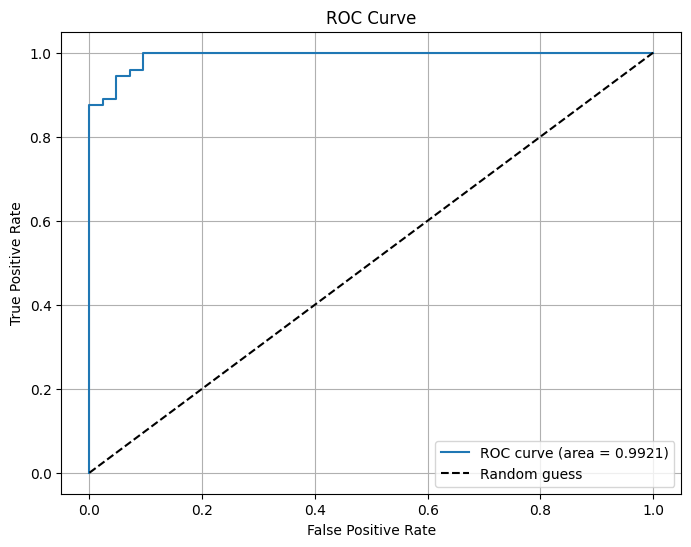

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_pred = np.full(y_train.shape, y_train.mean())

n_estimators = 100
learning_rate = 0.1
max_depth = 3

weak_learners = []

for i in range(n_estimators):
    residuals = y_train - y_train_pred

    tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree.fit(X_train_scaled, residuals)
    weak_learners.append(tree)

    update = learning_rate * tree.predict(X_train_scaled)
    y_train_pred += update

    if (i + 1) % 10 == 0 or i == 0:
        train_loss = np.mean((y_train - y_train_pred) ** 2)
        print(f"Iteration {i+1}/{n_estimators} - Training MSE: {train_loss:.4f}")

y_test_pred = np.full(y_test.shape, y_train.mean())
for tree in weak_learners:
    y_test_pred += learning_rate * tree.predict(X_test_scaled)

y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_test_pred_binary)
precision = precision_score(y_test, y_test_pred_binary)
recall = recall_score(y_test, y_test_pred_binary)
f1 = f1_score(y_test, y_test_pred_binary)
roc_auc = roc_auc_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
class_report = classification_report(y_test, y_test_pred_binary, target_names=data.target_names)

print("\nEvaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.4f})")
plt.plot([0,1], [0,1], 'k--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()
